# Advanced Image Classification


## Introduction

This project's goals are:

1. Using Tensorflow to classify images in Python
2. Use a Convolutional Neural Network (CNN) to classify images
3. Interpret the results of CNN using Tensorflow 
4. Use multiple pre-trained binary classifiers to make predictions on a set of images


| Dataset | Download Link | Filename | 
|---|---|---|
| CUB 200 | https://data.caltech.edu/records/65de6-vp158 | CUB_200_2011.tgz |

This project works on the advanced image classification starting with 10 models of birds:

##### <u> Model 1:  Parakeet Auklet - Myrtle Warble</u> **(Easy to Medium)**

 **Hypothesis**: Notice that these two birds are quite different from one other, which makes easy for the model at first. There is a difference based on the size and feather colors. While Parakeet Aulet tends to have bigger body feature and darker black skin and red beak, most of Myrtle Warble's pictures show that this bird species has yellow feathers at the breasts and tails.

##### <u>Model 2: Rhinoceros Auklet - Caspian Tern</u> **(Easy)**

 **Hypothesis**: With this pair of birds, I want to focus more on training the model by the length of bird wings' stretches and how we can differentiate 2 birds with this ornithological feature. The wings stretch of the Caspian Tern is usually longer comparing to the Rhinoceros Auklet's on average. The color of these 2 birds are also quite diverging on the gray scale, which set the difficulty bar lower. 

##### <u>Model 3: Red-winged Blackbird - House Sparrow</u> **(Medium)**

 **Hypothesis**: Red-winged Blackbird versus House Sparrow is considered medium for the model to differentiate since the size of these 2 birds are similar to one another. The only difference between these 2 bird species is more leaning toward the feather colors. Red Winged Blackbird is black and having the signature of read wing feather while the house sparrow has a overall brown and white feather. 

##### <u>Model 4: Fish Crow - Ruby-throated Hummingbird</u> **(Medium)**

 **Hypothesis**: This combination is at a medium level of difficulty since the size of 2 birds are similiar to one another. The physical feature of these 2 birds are also similar to one another in terms of wing size, beak length, and head-to-feet ratio. The only thing separating these 2 birds apart is the overall feather color. Although the color of Ruby-throated Hummingbird is more colorful than fish crow, it remains challenging for a computer vision task.

##### <u>Model 5: Yellow-billed Cuckoo - Pied Kingfisher</u> **(Medium - Hard)**

 **Hypothesis**: Similar to the last pair, Yellow-billed Cuckoo and Pied Kingfisher are also not quite an easy pair to differentiate due to the similarities of bird physiques, size of tails and beaks. One challenge the model might face is the difference in bird-background ratio for each bird picture or, in other words, the distance of camera lens to the birds' locations within the picture scope. Due to the difference of scale, this pair of birds seems to have the same size under the scope of computer vision, which can lead to errors in classifying. 

##### <u>Model 6: Acadian Flycatcher - Elegant Tern</u> **(Hard)**

 **Hypothesis**: At  first glance, I can set the level of difficulty for this pair of birds as easy to medium for difference in the color of these 2 birds. However, due to the marginal difference of object-background ratio, the sizes of the birds seems to be the same within the size of the pictures. After carefully considering this element, I re-evalute the hypothesis to be on the same level difficulty (medium to hard) with the previous pair.

##### <u>Model 7: Western Grebe - Rock Wren</u> **(Easy - Medium)**

 **Hypothesis**: This pair of birds might be easy to differentiate from the difference between 2 birds' natural habitats. The surrounding backgroups is the factor we want to evaluate our model since our goals for previous pairs is to only focus on the object but tend to ignore the surrounding area. As we process the pictures using computer vision, the computer cannot navigate the object within its background easily like human vision and cognitive pyschology. This is also the reason to chosse this pair for training the model architecture to see how accurate our model architecture is. 

##### <u>Model 8: Rose-breasted Grosbeak - Heermann Gull</u> **(Medium)**


 **Hypothesis**: One of the reasons to pair these 2 birds together is because of the similarities in terms of the color on bird anatomical segments. While Rose-breasted Grosbeak tends to have the red chest and white beak, Heermann Gull has red beak and white-to-grey chest. Computer Vision and Cognition tends not to work as well as human brain in terms of color. Therefore, when it comes to training the model architecture, there are potentially some marginal errors in identifying the bird body parts based on the colored pixels. 

##### <u>Model 9: Western Gull - Pacific Loon</u> **(Medium - Hard)**

 **Hypothesis**: Similar to the previous model, bring the test to the higher level by using the model architecture with birds having black-and-white spectrum to examine if the model will work on better on RGB pixels or grey scale. Moreover, Western Gull versus Pacific Loon are much harder than the last pair because they seem to have the same size, color of the feather, etc. which can make it hard for the binary classifiers to tell 2 birds apart.
 
##### <u>Model 10: Fox Sparrow - Palm Warbler</u> **(Hard)**

 **Hypothesis**: With the final pair,  bring all the elements from 9 previous model into this one in terms of birds choosing. These are 2 different types of birds that share 95% commonalities (by human eyes) when it comes to compare the feather colors and physical body sizes. I believe that the model architecture will face a challenging task in differentiating these 2 species.

These 10 pairs of bird are chosen based on the similarities in sizes, colors, bird's biological features. The level of difficulties will be decided by these features. With these 10 bird species pairs, we will conduct image classification with TensorFlow by training and validating binary classification models for all of the pairs. The binary classifier will be encode with 0 and 1 for the first and second bird respectively. The report will be displayed in different variable names respectively to each of 10 pairs. Every model should be a CNN with the (BLANK) architecture. For each model, conduct and report the following results:

1. Overall accuracy of the model
2. A confusion matrix of your validation set's True Positives, True Negatives, False Negatives, and False Positives 
3. Per class precision and recall (using `scikit-learn` functions)

## Data Exploration

In [86]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [73]:
def train_test(directory, train_seed, val_seed):
    '''
    Function splits a directory of 2 folders, each folder of one bird type, into training and validation set.
    Holdout set is kept unshuffled for labels.
    Returns 3 sets and filepaths.
    '''
    training_set = tf.keras.utils.image_dataset_from_directory(
      directory,
      seed=train_seed,
      image_size=(200, 200),
      subset='training',
      validation_split=0.3,
      batch_size=5)

    validation_set = tf.keras.utils.image_dataset_from_directory(
      directory,
      shuffle=True,
      seed=val_seed,
      image_size=(200, 200),
      validation_split=0.3,
      subset='validation',
      batch_size=5)


    holdout_set_all = tf.keras.utils.image_dataset_from_directory(
      directory,
      shuffle=False,
      seed=val_seed,
      image_size=(200, 200),
      batch_size=1) # batch size has to be one

    train_file_paths = training_set.file_paths
    validation_file_paths = validation_set.file_paths
    holdout_file_paths = holdout_set_all.file_paths
    
    return training_set, validation_set, holdout_set_all, train_file_paths, validation_file_paths, holdout_file_paths

In [74]:
def cnn_model():
    '''
    Function creates a keras Sequential CNN model with 3 convolutional layers and RMS stop.
    '''
    model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 200x200 with 3 bytes color
        # This is the first convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        # The second convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        # The third convolution
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(256, activation='relu'),
        # Only 1 output neuron. It will contain a value from 0-1 
        tf.keras.layers.Dense(1, activation='sigmoid')])
    
    RMSprop = tf.keras.dtensor.experimental.optimizers.RMSprop
    # could also use Adam here 
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics='accuracy')
    
    return model

## Code & Results


- 

### Model 1: Parakeet Auklet and Myrtle Warbler

In [187]:
# create model and split training data
training_set, validation_set, holdout_set_all, \
train_file_paths, validation_file_paths, holdout_file_paths = train_test('Birds/7_171', 50, 20)

mod1 = cnn_model()

Found 113 files belonging to 2 classes.
Using 80 files for training.
Found 113 files belonging to 2 classes.
Using 33 files for validation.
Found 113 files belonging to 2 classes.


In [188]:
# ensure correct class names
training_set.class_names, validation_set.class_names, holdout_set_all.class_names

(['007.Parakeet_Auklet', '171.Myrtle_Warbler'],
 ['007.Parakeet_Auklet', '171.Myrtle_Warbler'],
 ['007.Parakeet_Auklet', '171.Myrtle_Warbler'])

In [189]:
history = mod1.fit(training_set,
      epochs=9,
      verbose=1,
      validation_data = validation_set)

Epoch 1/9
16/16 [==============================] - 14s 729ms/step - loss: 607.3079 - accuracy: 0.4250 - val_loss: 0.6450 - val_accuracy: 0.5152
Epoch 2/9
16/16 [==============================] - 12s 736ms/step - loss: 1.4382 - accuracy: 0.6000 - val_loss: 0.5725 - val_accuracy: 0.7273
Epoch 3/9
16/16 [==============================] - 11s 681ms/step - loss: 1.4862 - accuracy: 0.6750 - val_loss: 0.5831 - val_accuracy: 0.7576
Epoch 4/9
16/16 [==============================] - 11s 643ms/step - loss: 1.1207 - accuracy: 0.6375 - val_loss: 0.6106 - val_accuracy: 0.6970
Epoch 5/9
16/16 [==============================] - 10s 613ms/step - loss: 0.9842 - accuracy: 0.7250 - val_loss: 0.3998 - val_accuracy: 0.9394
Epoch 6/9
16/16 [==============================] - 10s 630ms/step - loss: 2.2343 - accuracy: 0.7875 - val_loss: 0.6504 - val_accuracy: 0.6061
Epoch 7/9
16/16 [==============================] - 11s 668ms/step - loss: 5.6749 - accuracy: 0.7125 - val_loss: 0.4316 - val_accuracy: 0.7879
Epoc

In [190]:
images = []
labels = []
for e, image_label in enumerate(holdout_set_all):
    f = holdout_file_paths[e]
    if f in validation_file_paths:
        images.append(image_label[0].numpy())
        labels.append(image_label[1].numpy())
len(validation_file_paths), len(images), len(labels)

(33, 33, 33)

In [191]:
# evaluate validation set
mod1.evaluate(validation_set)

7/7 [==============================] - 1s 164ms/step - loss: 0.5263 - accuracy: 0.7576


[0.526310920715332, 0.7575757503509521]

In [192]:
img_arrays = []
for i in images:
    img_arrays.append(i)

test_dataset = tf.data.Dataset.from_tensor_slices(img_arrays)
preds = mod1.predict(test_dataset)

33/33 [==============================] - 1s 38ms/step


In [193]:
preds[0]

array([0.08573894], dtype=float32)

In [194]:
import pandas as pd
from collections import Counter
c = Counter([i[0] for i in labels])
c

Counter({0: 14, 1: 19})

In [195]:
df = pd.DataFrame()
df['true_label'] = [i[0] for i in labels]
df['predict_probability'] = [i[0] for i in preds]
df = df.sort_values(by='predict_probability')
inferred_labels = [0 for i in range(c[0])] + [1 for i in range(c[1])]
df['predicted_label'] = inferred_labels 
df['compare'] = df['true_label'] == df['predicted_label']
df.groupby(['true_label', 'compare']).count()

predict_probability  predicted_label
true_label compare                                      
0          False                      2                2
           True                      12               12
1          False                      2                2
           True                      17               17

In [88]:
from sklearn.metrics import confusion_matrix

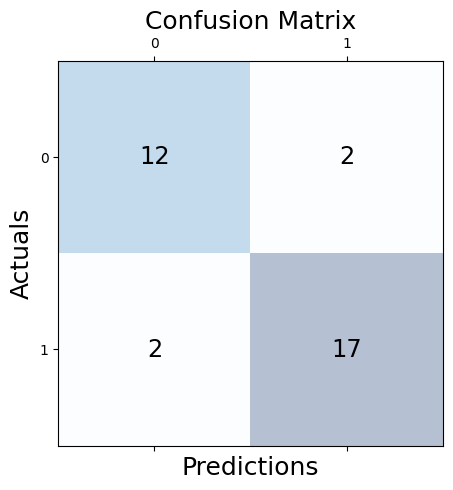

In [196]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=df['true_label'], y_pred= df['predicted_label'])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [197]:
# accuracy score
len(df.loc[df['compare'] == True])/len(df)

0.8787878787878788

In [198]:
# precision-recall-f1
from sklearn.metrics import classification_report
print(classification_report(df['true_label'], df['predicted_label'], target_names = [' Parakeet Auklet', 'Myrtle Warbler']))

                  precision    recall  f1-score   support

 Parakeet Auklet       0.86      0.86      0.86        14
  Myrtle Warbler       0.89      0.89      0.89        19

        accuracy                           0.88        33
       macro avg       0.88      0.88      0.88        33
    weighted avg       0.88      0.88      0.88        33



### Model 2 - Rhinoceros Auklet and Caspian Tern

In [199]:
# create model, split training data
training_set, validation_set, holdout_set_all, \
train_file_paths, validation_file_paths, holdout_file_paths = train_test('Birds/8_143', 50, 20)

mod2 = cnn_model()

Found 108 files belonging to 2 classes.
Using 76 files for training.
Found 108 files belonging to 2 classes.
Using 32 files for validation.
Found 108 files belonging to 2 classes.


In [200]:
training_set.class_names, validation_set.class_names, holdout_set_all.class_names

(['008.Rhinoceros_Auklet', '143.Caspian_Tern'],
 ['008.Rhinoceros_Auklet', '143.Caspian_Tern'],
 ['008.Rhinoceros_Auklet', '143.Caspian_Tern'])

In [201]:
images = []
labels = []
for e, image_label in enumerate(holdout_set_all):
    f = holdout_file_paths[e]
    if f in validation_file_paths:
        images.append(image_label[0].numpy())
        labels.append(image_label[1].numpy())
len(validation_file_paths), len(images), len(labels)

(32, 32, 32)

In [202]:
history = mod2.fit(training_set,
      epochs=9,
      verbose=2,
      validation_data = validation_set)

Epoch 1/9
16/16 - 17s - loss: 897.7000 - accuracy: 0.5395 - val_loss: 0.7360 - val_accuracy: 0.7188 - 17s/epoch - 1s/step
Epoch 2/9
16/16 - 12s - loss: 2.0712 - accuracy: 0.5789 - val_loss: 0.6178 - val_accuracy: 0.6875 - 12s/epoch - 733ms/step
Epoch 3/9
16/16 - 11s - loss: 1.0559 - accuracy: 0.6842 - val_loss: 0.6383 - val_accuracy: 0.6562 - 11s/epoch - 684ms/step
Epoch 4/9
16/16 - 9s - loss: 1.2053 - accuracy: 0.7368 - val_loss: 1.2803 - val_accuracy: 0.5000 - 9s/epoch - 572ms/step
Epoch 5/9
16/16 - 9s - loss: 7.2132 - accuracy: 0.5658 - val_loss: 0.6443 - val_accuracy: 0.8750 - 9s/epoch - 592ms/step
Epoch 6/9
16/16 - 10s - loss: 1.4525 - accuracy: 0.6974 - val_loss: 0.6210 - val_accuracy: 0.8125 - 10s/epoch - 600ms/step
Epoch 7/9
16/16 - 10s - loss: 6.9010 - accuracy: 0.6974 - val_loss: 0.4657 - val_accuracy: 0.7500 - 10s/epoch - 599ms/step
Epoch 8/9
16/16 - 9s - loss: 3.8606 - accuracy: 0.6447 - val_loss: 0.5603 - val_accuracy: 0.8750 - 9s/epoch - 582ms/step
Epoch 9/9
16/16 - 9s - 

In [94]:
# evaluate validation set
mod2.evaluate(validation_set)

7/7 [==============================] - 1s 183ms/step - loss: 0.3035 - accuracy: 0.8750


[0.3034543991088867, 0.875]

In [203]:
img_arrays = []
for i in images:
    img_arrays.append(i)

test_dataset = tf.data.Dataset.from_tensor_slices(img_arrays)
preds = mod2.predict(test_dataset)

32/32 [==============================] - 1s 31ms/step


In [204]:
c = Counter([i[0] for i in labels])
c

Counter({0: 14, 1: 18})

In [205]:
df = pd.DataFrame()
df['true_label'] = [i[0] for i in labels]
df['predict_probability'] = [i[0] for i in preds]
df = df.sort_values(by='predict_probability')
inferred_labels = [0 for i in range(c[0])] + [1 for i in range(c[1])]
df['predicted_label'] = inferred_labels 
df['compare'] = df['true_label'] == df['predicted_label']
df.groupby(['true_label', 'compare']).count()

predict_probability  predicted_label
true_label compare                                      
0          False                      2                2
           True                      12               12
1          False                      2                2
           True                      16               16

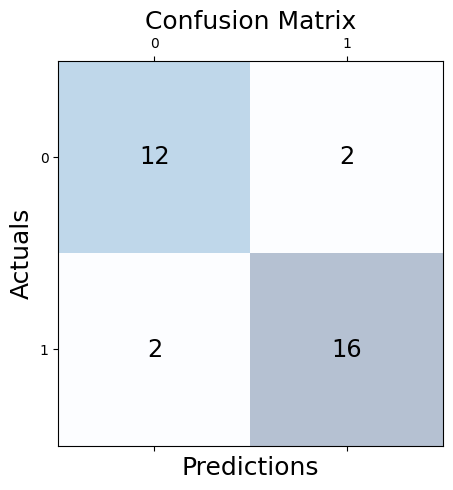

In [206]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=df['true_label'], y_pred= df['predicted_label'])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [207]:
# accuracy
len(df.loc[df['compare'] == True])/len(df)

0.875

In [208]:
# precision-recall-f1
print(classification_report(df['true_label'], df['predicted_label'], target_names = ['Rhinoceros Auklet', 'Caspian Tern']))

                   precision    recall  f1-score   support

Rhinoceros Auklet       0.86      0.86      0.86        14
     Caspian Tern       0.89      0.89      0.89        18

         accuracy                           0.88        32
        macro avg       0.87      0.87      0.87        32
     weighted avg       0.88      0.88      0.88        32



### Model 3 - Red-winged Blackbird and House Sparrow 

In [209]:
# create model, split training data
training_set, validation_set, holdout_set_all, \
train_file_paths, validation_file_paths, holdout_file_paths = train_test('Birds/10_118', 50, 20)

mod3 = cnn_model()

Found 120 files belonging to 2 classes.
Using 84 files for training.
Found 120 files belonging to 2 classes.
Using 36 files for validation.
Found 120 files belonging to 2 classes.


In [210]:
training_set.class_names, validation_set.class_names, holdout_set_all.class_names

(['010.Red_winged_Blackbird', '118.House_Sparrow'],
 ['010.Red_winged_Blackbird', '118.House_Sparrow'],
 ['010.Red_winged_Blackbird', '118.House_Sparrow'])

In [211]:
history = mod3.fit(training_set,
      epochs=9,
      verbose=2,
      validation_data = validation_set)

Epoch 1/9
17/17 - 16s - loss: 1444.8782 - accuracy: 0.5119 - val_loss: 0.7022 - val_accuracy: 0.5556 - 16s/epoch - 942ms/step
Epoch 2/9
17/17 - 14s - loss: 1.2072 - accuracy: 0.6667 - val_loss: 0.6445 - val_accuracy: 0.6944 - 14s/epoch - 812ms/step
Epoch 3/9
17/17 - 13s - loss: 2.9505 - accuracy: 0.6190 - val_loss: 0.6468 - val_accuracy: 0.5556 - 13s/epoch - 794ms/step
Epoch 4/9
17/17 - 12s - loss: 4.5505 - accuracy: 0.7024 - val_loss: 5.5151 - val_accuracy: 0.5278 - 12s/epoch - 685ms/step
Epoch 5/9
17/17 - 10s - loss: 5.9509 - accuracy: 0.5833 - val_loss: 0.5532 - val_accuracy: 0.8333 - 10s/epoch - 613ms/step
Epoch 6/9
17/17 - 10s - loss: 1.3921 - accuracy: 0.7262 - val_loss: 8.3780 - val_accuracy: 0.5278 - 10s/epoch - 607ms/step
Epoch 7/9
17/17 - 10s - loss: 2.9731 - accuracy: 0.7500 - val_loss: 0.3756 - val_accuracy: 0.8889 - 10s/epoch - 605ms/step
Epoch 8/9
17/17 - 10s - loss: 0.3386 - accuracy: 0.8929 - val_loss: 0.3230 - val_accuracy: 0.9444 - 10s/epoch - 597ms/step
Epoch 9/9
17/

In [212]:
images = []
labels = []
for e, image_label in enumerate(holdout_set_all):
    f = holdout_file_paths[e]
    if f in validation_file_paths:
        images.append(image_label[0].numpy())
        labels.append(image_label[1].numpy())
len(validation_file_paths), len(images), len(labels)

(36, 36, 36)

In [213]:
# evaluate validation set
mod3.evaluate(validation_set)

8/8 [==============================] - 1s 111ms/step - loss: 0.4007 - accuracy: 0.8056


[0.4007023572921753, 0.8055555820465088]

In [214]:
img_arrays = []
for i in images:
    img_arrays.append(i)

test_dataset = tf.data.Dataset.from_tensor_slices(img_arrays)
preds = mod3.predict(test_dataset)

36/36 [==============================] - 1s 32ms/step


In [215]:
c = Counter([i[0] for i in labels])
c

Counter({0: 17, 1: 19})

In [216]:
df = pd.DataFrame()
df['true_label'] = [i[0] for i in labels]
df['predict_probability'] = [i[0] for i in preds]
df = df.sort_values(by='predict_probability')
inferred_labels = [0 for i in range(c[0])] + [1 for i in range(c[1])]
df['predicted_label'] = inferred_labels 
df['compare'] = df['true_label'] == df['predicted_label']
df.groupby(['true_label', 'compare']).count()

predict_probability  predicted_label
true_label compare                                      
0          False                      1                1
           True                      16               16
1          False                      1                1
           True                      18               18

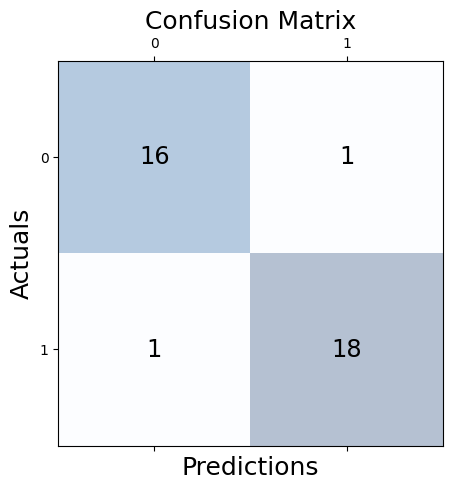

In [217]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=df['true_label'], y_pred= df['predicted_label'])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [218]:
# accuracy
len(df.loc[df['compare'] == True])/len(df)

0.9444444444444444

In [219]:
# precision-recall-f1
print(classification_report(df['true_label'], df['predicted_label'], target_names = ['Red-winged Blackbird','House Sparrow']))

                      precision    recall  f1-score   support

Red-winged Blackbird       0.94      0.94      0.94        17
       House Sparrow       0.95      0.95      0.95        19

            accuracy                           0.94        36
           macro avg       0.94      0.94      0.94        36
        weighted avg       0.94      0.94      0.94        36



### Model 4 - Fish Crow and Ruby-throated Hummingbird

In [220]:
# create model, split training data
training_set, validation_set, holdout_set_all, \
train_file_paths, validation_file_paths, holdout_file_paths = train_test('Birds/30_68', 50, 20)

mod4 = cnn_model()

Found 120 files belonging to 2 classes.
Using 84 files for training.
Found 120 files belonging to 2 classes.
Using 36 files for validation.
Found 120 files belonging to 2 classes.


In [221]:
training_set.class_names, validation_set.class_names, holdout_set_all.class_names

(['030.Fish_Crow', '068.Ruby_throated_Hummingbird'],
 ['030.Fish_Crow', '068.Ruby_throated_Hummingbird'],
 ['030.Fish_Crow', '068.Ruby_throated_Hummingbird'])

In [222]:
history = mod4.fit(training_set,
      epochs=9,
      verbose=1,
      validation_data = validation_set)

Epoch 1/9
17/17 [==============================] - 17s 824ms/step - loss: 198.0792 - accuracy: 0.4762 - val_loss: 1.0639 - val_accuracy: 0.6111
Epoch 2/9
17/17 [==============================] - 12s 695ms/step - loss: 1.1136 - accuracy: 0.6667 - val_loss: 0.8923 - val_accuracy: 0.6111
Epoch 3/9
17/17 [==============================] - 15s 833ms/step - loss: 0.6474 - accuracy: 0.7738 - val_loss: 1.1156 - val_accuracy: 0.6944
Epoch 4/9
17/17 [==============================] - 15s 873ms/step - loss: 0.5048 - accuracy: 0.8095 - val_loss: 0.3402 - val_accuracy: 0.8889
Epoch 5/9
17/17 [==============================] - 14s 811ms/step - loss: 5.5008 - accuracy: 0.6548 - val_loss: 0.2438 - val_accuracy: 0.8333
Epoch 6/9
17/17 [==============================] - 15s 843ms/step - loss: 0.9102 - accuracy: 0.8571 - val_loss: 0.2269 - val_accuracy: 0.9444
Epoch 7/9
17/17 [==============================] - 11s 655ms/step - loss: 0.3836 - accuracy: 0.9286 - val_loss: 0.2086 - val_accuracy: 0.9722
Epoc

In [223]:
images = []
labels = []
for e, image_label in enumerate(holdout_set_all):
    f = holdout_file_paths[e]
    if f in validation_file_paths:
        images.append(image_label[0].numpy())
        labels.append(image_label[1].numpy())
len(validation_file_paths), len(images), len(labels)

(36, 36, 36)

In [224]:
# evaluate validation set
mod4.evaluate(validation_set)

8/8 [==============================] - 1s 119ms/step - loss: 0.2790 - accuracy: 0.9444


[0.27899521589279175, 0.9444444179534912]

In [225]:
img_arrays = []
for i in images:
    img_arrays.append(i)

test_dataset = tf.data.Dataset.from_tensor_slices(img_arrays)
preds = mod4.predict(test_dataset)

36/36 [==============================] - 1s 30ms/step


In [226]:
c = Counter([i[0] for i in labels])
df = pd.DataFrame()
df['true_label'] = [i[0] for i in labels]
df['predict_probability'] = [i[0] for i in preds]
df = df.sort_values(by='predict_probability')
inferred_labels = [0 for i in range(c[0])] + [1 for i in range(c[1])]
df['predicted_label'] = inferred_labels 
df['compare'] = df['true_label'] == df['predicted_label']
df.groupby(['true_label', 'compare']).count()

predict_probability  predicted_label
true_label compare                                      
0          False                      1                1
           True                      16               16
1          False                      1                1
           True                      18               18

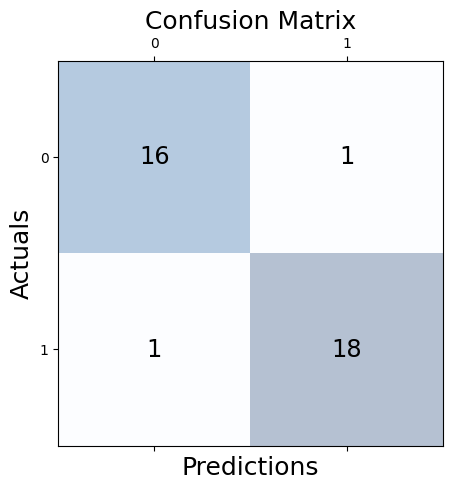

In [227]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=df['true_label'], y_pred= df['predicted_label'])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [228]:
# accuracy
len(df.loc[df['compare'] == True])/len(df)

0.9444444444444444

In [229]:
# precision-recall-f1
print(classification_report(df['true_label'], df['predicted_label'], target_names = ['Fish Crow','Ruby-throated Hummingbird']))

                           precision    recall  f1-score   support

                Fish Crow       0.94      0.94      0.94        17
Ruby-throated Hummingbird       0.95      0.95      0.95        19

                 accuracy                           0.94        36
                macro avg       0.94      0.94      0.94        36
             weighted avg       0.94      0.94      0.94        36



### Model 5 - Yellow-billed Cuckoo and Pied Kingfisher

In [131]:
# create model, split training data
training_set, validation_set, holdout_set_all, \
train_file_paths, validation_file_paths, holdout_file_paths = train_test('Birds/33_81', 50, 20)

mod5 = cnn_model()

Found 119 files belonging to 2 classes.
Using 84 files for training.
Found 119 files belonging to 2 classes.
Using 35 files for validation.
Found 119 files belonging to 2 classes.


In [133]:
history = mod5.fit(training_set,
      epochs=9,
      verbose=1,
      validation_data = validation_set)

Epoch 1/9
17/17 [==============================] - 18s 921ms/step - loss: 434.6185 - accuracy: 0.4762 - val_loss: 0.9972 - val_accuracy: 0.5143
Epoch 2/9
17/17 [==============================] - 14s 850ms/step - loss: 1.0259 - accuracy: 0.5952 - val_loss: 0.7386 - val_accuracy: 0.6000
Epoch 3/9
17/17 [==============================] - 13s 748ms/step - loss: 1.2561 - accuracy: 0.5952 - val_loss: 0.5952 - val_accuracy: 0.6571
Epoch 4/9
17/17 [==============================] - 16s 894ms/step - loss: 0.9535 - accuracy: 0.6667 - val_loss: 0.7606 - val_accuracy: 0.6286
Epoch 5/9
17/17 [==============================] - 14s 795ms/step - loss: 2.7809 - accuracy: 0.6667 - val_loss: 0.4919 - val_accuracy: 0.8857
Epoch 6/9
17/17 [==============================] - 12s 696ms/step - loss: 1.9091 - accuracy: 0.7381 - val_loss: 0.3706 - val_accuracy: 0.8571
Epoch 7/9
17/17 [==============================] - 15s 919ms/step - loss: 3.1986 - accuracy: 0.6786 - val_loss: 12.3239 - val_accuracy: 0.4571
Epo

In [134]:
images = []
labels = []
for e, image_label in enumerate(holdout_set_all):
    f = holdout_file_paths[e]
    if f in validation_file_paths:
        images.append(image_label[0].numpy())
        labels.append(image_label[1].numpy())
len(validation_file_paths), len(images), len(labels)

(35, 35, 35)

In [135]:
# evaluate validation set
mod5.evaluate(validation_set)

7/7 [==============================] - 1s 171ms/step - loss: 0.1068 - accuracy: 0.9429


[0.10676251351833344, 0.9428571462631226]

In [136]:
img_arrays = []
for i in images:
    img_arrays.append(i)

test_dataset = tf.data.Dataset.from_tensor_slices(img_arrays)
preds = mod5.predict(test_dataset)

35/35 [==============================] - 1s 34ms/step


In [137]:
c = Counter([i[0] for i in labels])
df = pd.DataFrame()
df['true_label'] = [i[0] for i in labels]
df['predict_probability'] = [i[0] for i in preds]
df = df.sort_values(by='predict_probability')
inferred_labels = [0 for i in range(c[0])] + [1 for i in range(c[1])]
df['predicted_label'] = inferred_labels 
df['compare'] = df['true_label'] == df['predicted_label']
df.groupby(['true_label', 'compare']).count()

predict_probability  predicted_label
true_label compare                                      
0          False                      1                1
           True                      15               15
1          False                      1                1
           True                      18               18

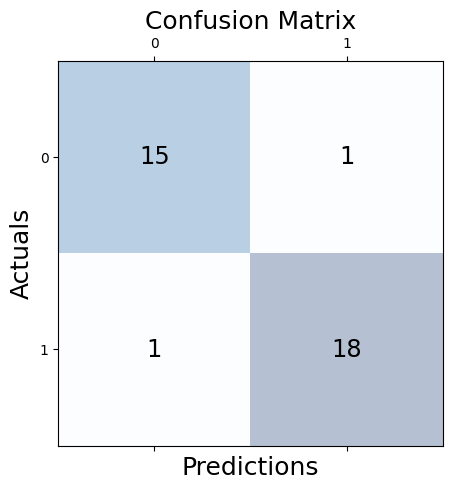

In [138]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=df['true_label'], y_pred= df['predicted_label'])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [139]:
# accuracy
len(df.loc[df['compare'] == True])/len(df)

0.9428571428571428

In [140]:
# precision-recall-f1
print(classification_report(df['true_label'], df['predicted_label'], target_names = ['Yellow-billed Cuckoo','Pied Kingfisher']))

                      precision    recall  f1-score   support

Yellow-billed Cuckoo       0.94      0.94      0.94        16
     Pied Kingfisher       0.95      0.95      0.95        19

            accuracy                           0.94        35
           macro avg       0.94      0.94      0.94        35
        weighted avg       0.94      0.94      0.94        35



### Model 6 - Acadian Flycatcher and Elegant Tern

In [141]:
# create model, split training data
training_set, validation_set, holdout_set_all, \
train_file_paths, validation_file_paths, holdout_file_paths = train_test('Birds/37_145', 50, 20)

mod6 = cnn_model()

Found 119 files belonging to 2 classes.
Using 84 files for training.
Found 119 files belonging to 2 classes.
Using 35 files for validation.
Found 119 files belonging to 2 classes.


In [142]:
training_set.class_names, validation_set.class_names, holdout_set_all.class_names

(['037.Acadian_Flycatcher', '145.Elegant_Tern'],
 ['037.Acadian_Flycatcher', '145.Elegant_Tern'],
 ['037.Acadian_Flycatcher', '145.Elegant_Tern'])

In [143]:
history = mod6.fit(training_set,
      epochs=9,
      verbose=1,
      validation_data = validation_set)

Epoch 1/9
17/17 [==============================] - 17s 828ms/step - loss: 701.5317 - accuracy: 0.6310 - val_loss: 0.4743 - val_accuracy: 0.8000
Epoch 2/9
17/17 [==============================] - 12s 696ms/step - loss: 0.9158 - accuracy: 0.7381 - val_loss: 0.6261 - val_accuracy: 0.5429
Epoch 3/9
17/17 [==============================] - 11s 617ms/step - loss: 2.5787 - accuracy: 0.6667 - val_loss: 0.5573 - val_accuracy: 0.7143
Epoch 4/9
17/17 [==============================] - 16s 903ms/step - loss: 1.1496 - accuracy: 0.6667 - val_loss: 5.0682 - val_accuracy: 0.5429
Epoch 5/9
17/17 [==============================] - 16s 944ms/step - loss: 0.6221 - accuracy: 0.7857 - val_loss: 0.3683 - val_accuracy: 0.9143
Epoch 6/9
17/17 [==============================] - 16s 916ms/step - loss: 1.3192 - accuracy: 0.7024 - val_loss: 0.5653 - val_accuracy: 0.7714
Epoch 7/9
17/17 [==============================] - 14s 839ms/step - loss: 2.2103 - accuracy: 0.8214 - val_loss: 0.5034 - val_accuracy: 0.9429
Epoc

In [144]:
images = []
labels = []
for e, image_label in enumerate(holdout_set_all):
    f = holdout_file_paths[e]
    if f in validation_file_paths:
        images.append(image_label[0].numpy())
        labels.append(image_label[1].numpy())
len(validation_file_paths), len(images), len(labels)

(35, 35, 35)

In [145]:
# evaluate validation set
mod6.evaluate(validation_set)

7/7 [==============================] - 1s 190ms/step - loss: 0.4248 - accuracy: 0.9429


[0.424775093793869, 0.9428571462631226]

In [146]:
img_arrays = []
for i in images:
    img_arrays.append(i)

test_dataset = tf.data.Dataset.from_tensor_slices(img_arrays)
preds = mod6.predict(test_dataset)

35/35 [==============================] - 2s 51ms/step


In [147]:
c = Counter([i[0] for i in labels])
df = pd.DataFrame()
df['true_label'] = [i[0] for i in labels]
df['predict_probability'] = [i[0] for i in preds]
df = df.sort_values(by='predict_probability')
inferred_labels = [0 for i in range(c[0])] + [1 for i in range(c[1])]
df['predicted_label'] = inferred_labels 
df['compare'] = df['true_label'] == df['predicted_label']
df.groupby(['true_label', 'compare']).count()

predict_probability  predicted_label
true_label compare                                      
0          False                      2                2
           True                      14               14
1          False                      2                2
           True                      17               17

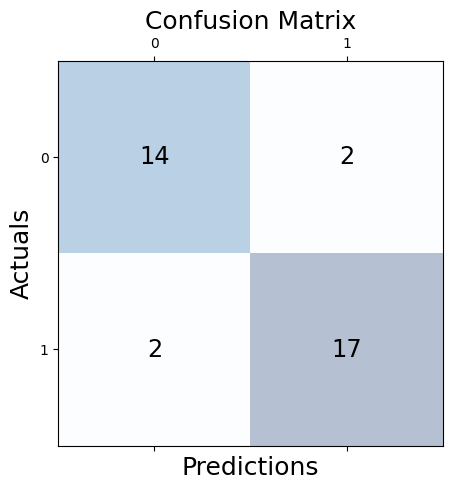

In [148]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=df['true_label'], y_pred= df['predicted_label'])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [149]:
# accuracy
len(df.loc[df['compare'] == True])/len(df)

0.8857142857142857

In [150]:
# precision-recall-f1
print(classification_report(df['true_label'], df['predicted_label'], target_names = ['Acadian Flycatcher','Elegant Tern']))

                    precision    recall  f1-score   support

Acadian Flycatcher       0.88      0.88      0.88        16
      Elegant Tern       0.89      0.89      0.89        19

          accuracy                           0.89        35
         macro avg       0.88      0.88      0.88        35
      weighted avg       0.89      0.89      0.89        35



### Model 7 - Western Grebe and Rock Wren

In [151]:
# create model, split training data
training_set, validation_set, holdout_set_all, \
train_file_paths, validation_file_paths, holdout_file_paths = train_test('Birds/53_198', 50, 20)

mod7 = cnn_model()

Found 120 files belonging to 2 classes.
Using 84 files for training.
Found 120 files belonging to 2 classes.
Using 36 files for validation.
Found 120 files belonging to 2 classes.


In [152]:
history = mod7.fit(training_set,
      epochs=9,
      verbose=1,
      validation_data = validation_set)

Epoch 1/9
17/17 [==============================] - 20s 982ms/step - loss: 750.9814 - accuracy: 0.5119 - val_loss: 0.6296 - val_accuracy: 0.6944
Epoch 2/9
17/17 [==============================] - 13s 750ms/step - loss: 1.0018 - accuracy: 0.6548 - val_loss: 0.6097 - val_accuracy: 0.7500
Epoch 3/9
17/17 [==============================] - 16s 941ms/step - loss: 1.2063 - accuracy: 0.7024 - val_loss: 0.5443 - val_accuracy: 0.7500
Epoch 4/9
17/17 [==============================] - 15s 843ms/step - loss: 0.7748 - accuracy: 0.7500 - val_loss: 0.5093 - val_accuracy: 0.9444
Epoch 5/9
17/17 [==============================] - 12s 678ms/step - loss: 3.6243 - accuracy: 0.6548 - val_loss: 0.6119 - val_accuracy: 0.7222
Epoch 6/9
17/17 [==============================] - 14s 822ms/step - loss: 3.0213 - accuracy: 0.6786 - val_loss: 0.5500 - val_accuracy: 0.6667
Epoch 7/9
17/17 [==============================] - 15s 856ms/step - loss: 1.7167 - accuracy: 0.7976 - val_loss: 1.2807 - val_accuracy: 0.5556
Epoc

In [153]:
images = []
labels = []
for e, image_label in enumerate(holdout_set_all):
    f = holdout_file_paths[e]
    if f in validation_file_paths:
        images.append(image_label[0].numpy())
        labels.append(image_label[1].numpy())
len(validation_file_paths), len(images), len(labels)

(36, 36, 36)

In [154]:
# evaluate validation set
mod7.evaluate(validation_set)

8/8 [==============================] - 2s 176ms/step - loss: 0.3719 - accuracy: 0.8333


[0.37189981341362, 0.8333333134651184]

In [155]:
img_arrays = []
for i in images:
    img_arrays.append(i)

test_dataset = tf.data.Dataset.from_tensor_slices(img_arrays)
preds = mod7.predict(test_dataset)

36/36 [==============================] - 1s 36ms/step


In [156]:
c = Counter([i[0] for i in labels])
df = pd.DataFrame()
df['true_label'] = [i[0] for i in labels]
df['predict_probability'] = [i[0] for i in preds]
df = df.sort_values(by='predict_probability')
inferred_labels = [0 for i in range(c[0])] + [1 for i in range(c[1])]
df['predicted_label'] = inferred_labels 
df['compare'] = df['true_label'] == df['predicted_label']
df.groupby(['true_label', 'compare']).count()

predict_probability  predicted_label
true_label compare                                      
0          False                      4                4
           True                      13               13
1          False                      4                4
           True                      15               15

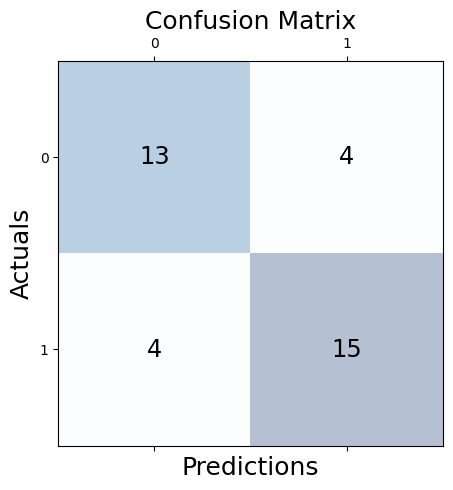

In [157]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=df['true_label'], y_pred= df['predicted_label'])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [158]:
# accuracy
len(df.loc[df['compare'] == True])/len(df)

0.7777777777777778

In [159]:
# precision-recall-f1
print(classification_report(df['true_label'], df['predicted_label'], target_names = ['Western Grebe', 'Rock Wren']))

               precision    recall  f1-score   support

Western Grebe       0.76      0.76      0.76        17
    Rock Wren       0.79      0.79      0.79        19

     accuracy                           0.78        36
    macro avg       0.78      0.78      0.78        36
 weighted avg       0.78      0.78      0.78        36



### Model 8 - Rose-breasted Grosbeak and Heermann Gull 

In [160]:
# create model, split training data
training_set, validation_set, holdout_set_all, \
train_file_paths, validation_file_paths, holdout_file_paths = train_test('Birds/57_61', 50, 20)

mod8 = cnn_model()

Found 120 files belonging to 2 classes.
Using 84 files for training.
Found 120 files belonging to 2 classes.
Using 36 files for validation.
Found 120 files belonging to 2 classes.


In [161]:
history = mod8.fit(training_set,
      epochs=9,
      verbose=1,
      validation_data = validation_set)

Epoch 1/9
17/17 [==============================] - 17s 795ms/step - loss: 664.5509 - accuracy: 0.5952 - val_loss: 0.6343 - val_accuracy: 0.6389
Epoch 2/9
17/17 [==============================] - 15s 839ms/step - loss: 0.8960 - accuracy: 0.7500 - val_loss: 0.5418 - val_accuracy: 0.7778
Epoch 3/9
17/17 [==============================] - 13s 726ms/step - loss: 2.4568 - accuracy: 0.6667 - val_loss: 0.5304 - val_accuracy: 0.7778
Epoch 4/9
17/17 [==============================] - 14s 842ms/step - loss: 1.1396 - accuracy: 0.7857 - val_loss: 0.4462 - val_accuracy: 0.9444
Epoch 5/9
17/17 [==============================] - 17s 958ms/step - loss: 1.5087 - accuracy: 0.8690 - val_loss: 1.2199 - val_accuracy: 0.7500
Epoch 6/9
17/17 [==============================] - 14s 793ms/step - loss: 1.3925 - accuracy: 0.8214 - val_loss: 0.1864 - val_accuracy: 0.9444
Epoch 7/9
17/17 [==============================] - 14s 827ms/step - loss: 19.9041 - accuracy: 0.7738 - val_loss: 0.1467 - val_accuracy: 0.9444
Epo

In [162]:
images = []
labels = []
for e, image_label in enumerate(holdout_set_all):
    f = holdout_file_paths[e]
    if f in validation_file_paths:
        images.append(image_label[0].numpy())
        labels.append(image_label[1].numpy())
len(validation_file_paths), len(images), len(labels)

(36, 36, 36)

In [163]:
# evaluate validation set
mod8.evaluate(validation_set)

8/8 [==============================] - 2s 168ms/step - loss: 0.5579 - accuracy: 0.7500


[0.557929515838623, 0.75]

In [164]:
img_arrays = []
for i in images:
    img_arrays.append(i)

test_dataset = tf.data.Dataset.from_tensor_slices(img_arrays)
preds = mod8.predict(test_dataset)

36/36 [==============================] - 2s 39ms/step


In [165]:
c = Counter([i[0] for i in labels])
df = pd.DataFrame()
df['true_label'] = [i[0] for i in labels]
df['predict_probability'] = [i[0] for i in preds]
df = df.sort_values(by='predict_probability')
inferred_labels = [0 for i in range(c[0])] + [1 for i in range(c[1])]
df['predicted_label'] = inferred_labels 
df['compare'] = df['true_label'] == df['predicted_label']
df.groupby(['true_label', 'compare']).count()

,,predict_probability,predicted_label
true_label,compare,,
0,True,17,17
1,True,19,19


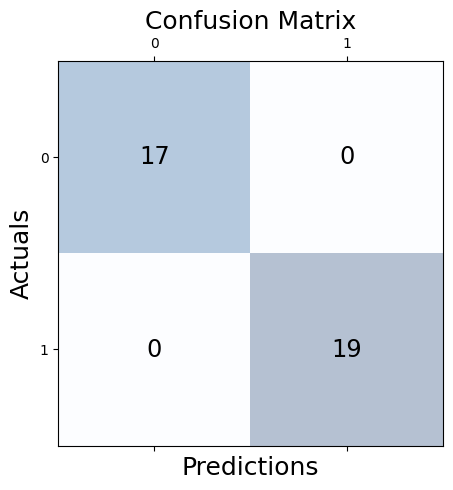

In [166]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=df['true_label'], y_pred= df['predicted_label'])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [167]:
# accuracy
len(df.loc[df['compare'] == True])/len(df)

1.0

In [168]:
# precision-recall-f1
print(classification_report(df['true_label'], df['predicted_label'], target_names = ['Rose-breasted Grosbeak','Heermann Gull ']))

                        precision    recall  f1-score   support

Rose-breasted Grosbeak       1.00      1.00      1.00        17
        Heermann Gull        1.00      1.00      1.00        19

              accuracy                           1.00        36
             macro avg       1.00      1.00      1.00        36
          weighted avg       1.00      1.00      1.00        36



### Model 9 - Western Gull and Pacific Loon

In [169]:
# create model, split training data
training_set, validation_set, holdout_set_all, \
train_file_paths, validation_file_paths, holdout_file_paths = train_test('Birds/66_86', 50, 20)

mod9 = cnn_model()

Found 120 files belonging to 2 classes.
Using 84 files for training.
Found 120 files belonging to 2 classes.
Using 36 files for validation.
Found 120 files belonging to 2 classes.


In [170]:
history = mod9.fit(training_set,
      epochs=9,
      verbose=1,
      validation_data = validation_set)

Epoch 1/9
17/17 [==============================] - 18s 911ms/step - loss: 1468.9326 - accuracy: 0.4643 - val_loss: 1.3672 - val_accuracy: 0.4722
Epoch 2/9
17/17 [==============================] - 20s 1s/step - loss: 1.2472 - accuracy: 0.6190 - val_loss: 0.6225 - val_accuracy: 0.5556
Epoch 3/9
17/17 [==============================] - 13s 775ms/step - loss: 1.2175 - accuracy: 0.5714 - val_loss: 0.6177 - val_accuracy: 0.6111
Epoch 4/9
17/17 [==============================] - 15s 850ms/step - loss: 1.0944 - accuracy: 0.6310 - val_loss: 0.6079 - val_accuracy: 0.7222
Epoch 5/9
17/17 [==============================] - 13s 772ms/step - loss: 5.1883 - accuracy: 0.7619 - val_loss: 0.4957 - val_accuracy: 0.6667
Epoch 6/9
17/17 [==============================] - 14s 824ms/step - loss: 0.6769 - accuracy: 0.7381 - val_loss: 0.6583 - val_accuracy: 0.7222
Epoch 7/9
17/17 [==============================] - 15s 862ms/step - loss: 4.3634 - accuracy: 0.6429 - val_loss: 0.3434 - val_accuracy: 0.8611
Epoch 

In [171]:
images = []
labels = []
for e, image_label in enumerate(holdout_set_all):
    f = holdout_file_paths[e]
    if f in validation_file_paths:
        images.append(image_label[0].numpy())
        labels.append(image_label[1].numpy())
len(validation_file_paths), len(images), len(labels)

(36, 36, 36)

In [172]:
# evaluate training set
mod9.evaluate(validation_set)

8/8 [==============================] - 2s 160ms/step - loss: 0.6022 - accuracy: 0.7222


[0.6021958589553833, 0.7222222089767456]

In [173]:
img_arrays = []
for i in images:
    img_arrays.append(i)

test_dataset = tf.data.Dataset.from_tensor_slices(img_arrays)
preds = mod9.predict(test_dataset)

36/36 [==============================] - 2s 40ms/step


In [174]:
c = Counter([i[0] for i in labels])
df = pd.DataFrame()
df['true_label'] = [i[0] for i in labels]
df['predict_probability'] = [i[0] for i in preds]
df = df.sort_values(by='predict_probability')
inferred_labels = [0 for i in range(c[0])] + [1 for i in range(c[1])]
df['predicted_label'] = inferred_labels 
df['compare'] = df['true_label'] == df['predicted_label']
df.groupby(['true_label', 'compare']).count()

predict_probability  predicted_label
true_label compare                                      
0          False                      8                8
           True                       9                9
1          False                      8                8
           True                      11               11

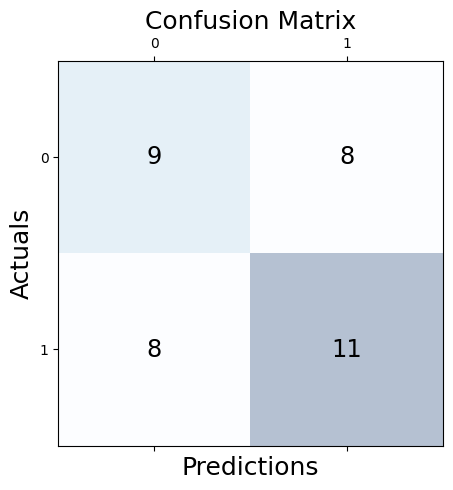

In [175]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=df['true_label'], y_pred= df['predicted_label'])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [176]:
# accuracy
len(df.loc[df['compare'] == True])/len(df)

0.5555555555555556

In [177]:
# precision-recall-f1
print(classification_report(df['true_label'], df['predicted_label'], target_names = ['Western Gull','Pacific Loon']))

              precision    recall  f1-score   support

Western Gull       0.53      0.53      0.53        17
Pacific Loon       0.58      0.58      0.58        19

    accuracy                           0.56        36
   macro avg       0.55      0.55      0.55        36
weighted avg       0.56      0.56      0.56        36



### Model 10 - Fox Sparrow and Palm Warbler

In [178]:
# create model, split training data
training_set, validation_set, holdout_set_all, \
train_file_paths, validation_file_paths, holdout_file_paths = train_test('Birds/120_174', 50, 20)

mod10 = cnn_model()

Found 120 files belonging to 2 classes.
Using 84 files for training.
Found 120 files belonging to 2 classes.
Using 36 files for validation.
Found 120 files belonging to 2 classes.


In [179]:
history = mod10.fit(training_set,
      epochs=9,
      verbose=1,
      validation_data = validation_set)

Epoch 1/9
17/17 [==============================] - 18s 872ms/step - loss: 1338.9724 - accuracy: 0.5595 - val_loss: 0.6315 - val_accuracy: 0.6389
Epoch 2/9
17/17 [==============================] - 20s 1s/step - loss: 2.1102 - accuracy: 0.5238 - val_loss: 0.5846 - val_accuracy: 0.7500
Epoch 3/9
17/17 [==============================] - 15s 847ms/step - loss: 2.1392 - accuracy: 0.5714 - val_loss: 0.6590 - val_accuracy: 0.5556
Epoch 4/9
17/17 [==============================] - 15s 892ms/step - loss: 1.2651 - accuracy: 0.5714 - val_loss: 0.6789 - val_accuracy: 0.5556
Epoch 5/9
17/17 [==============================] - 15s 877ms/step - loss: 1.9439 - accuracy: 0.5952 - val_loss: 0.6077 - val_accuracy: 0.5833
Epoch 6/9
17/17 [==============================] - 11s 641ms/step - loss: 0.8824 - accuracy: 0.6548 - val_loss: 0.5560 - val_accuracy: 0.8056
Epoch 7/9
17/17 [==============================] - 11s 629ms/step - loss: 8.8488 - accuracy: 0.4405 - val_loss: 0.5802 - val_accuracy: 0.7778
Epoch 

In [180]:
images = []
labels = []
for e, image_label in enumerate(holdout_set_all):
    f = holdout_file_paths[e]
    if f in validation_file_paths:
        images.append(image_label[0].numpy())
        labels.append(image_label[1].numpy())
len(validation_file_paths), len(images), len(labels)

(36, 36, 36)

In [181]:
# evaluate validation set
mod10.evaluate(validation_set)

8/8 [==============================] - 1s 111ms/step - loss: 0.5566 - accuracy: 0.6944


[0.5565930008888245, 0.6944444179534912]

In [182]:
img_arrays = []
for i in images:
    img_arrays.append(i)

test_dataset = tf.data.Dataset.from_tensor_slices(img_arrays)
preds = mod10.predict(test_dataset)

36/36 [==============================] - 1s 32ms/step


In [183]:
c = Counter([i[0] for i in labels])
df = pd.DataFrame()
df['true_label'] = [i[0] for i in labels]
df['predict_probability'] = [i[0] for i in preds]
df = df.sort_values(by='predict_probability')
inferred_labels = [0 for i in range(c[0])] + [1 for i in range(c[1])]
df['predicted_label'] = inferred_labels 
df['compare'] = df['true_label'] == df['predicted_label']
df.groupby(['true_label', 'compare']).count()

predict_probability  predicted_label
true_label compare                                      
0          False                      5                5
           True                      12               12
1          False                      5                5
           True                      14               14

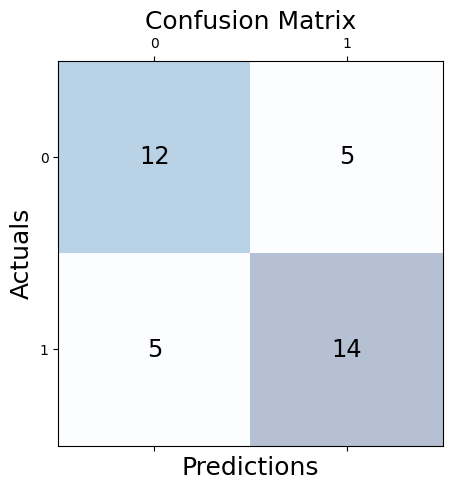

In [184]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=df['true_label'], y_pred= df['predicted_label'])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [185]:
# accuracy
len(df.loc[df['compare'] == True])/len(df)

0.7222222222222222

In [186]:
# precision-recall-f1
print(classification_report(df['true_label'], df['predicted_label'], target_names = ['Fox Sparrow', 'Palm Warbler']))

              precision    recall  f1-score   support

 Fox Sparrow       0.71      0.71      0.71        17
Palm Warbler       0.74      0.74      0.74        19

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.72      0.72      0.72        36



### Describe Novel Data

We choose species number 106 - Horned Puffin to describe using our 10 models

In [257]:
# read images into tensorflow dataset
novel_106 = tf.keras.utils.image_dataset_from_directory(
      'Birds/106.Horned_Puffin',
      shuffle=False,
      labels = None,
      seed=20,
      image_size=(200, 200),
      batch_size=1)

Found 60 files belonging to 1 classes.


In [258]:
# prediction probability for each model
preds1 = mod1.predict(novel_106)
preds2 = mod2.predict(novel_106)
preds3 = mod3.predict(novel_106)
preds4 = mod4.predict(novel_106)
preds5 = mod5.predict(novel_106)
preds6 = mod6.predict(novel_106)
preds7 = mod7.predict(novel_106)
preds8 = mod8.predict(novel_106)
preds9 = mod9.predict(novel_106)
preds10 = mod10.predict(novel_106)

60/60 [==============================] - 5s 46ms/step


In [274]:
# create column image
image_num = [f'Image {i}' for i in range(1,61)]

In [276]:
# df describe the new bird
novel_106_df = pd.DataFrame({
    'image': image_num,
    'model1': [i[0] for i in preds1],
    'model2': [i[0] for i in preds2],
    'model3': [i[0] for i in preds3],
    'model4': [i[0] for i in preds4],
    'model5': [i[0] for i in preds5],
    'model6': [i[0] for i in preds6],
    'model7': [i[0] for i in preds7],
    'model8': [i[0] for i in preds8],
    'model9': [i[0] for i in preds9],
    'model10': [i[0] for i in preds10]
})

In [277]:
novel_106_df

,image,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10
0,Image 1,0.650312,1.871694e-01,6.255927e-03,4.422635e-01,9.513812e-01,0.573726,9.488379e-01,1.960590e-03,4.849122e-01,0.426456
1,Image 2,0.458417,3.721912e-01,1.656577e-01,4.663152e-01,8.932869e-01,0.779159,7.540747e-03,3.360294e-04,5.076917e-01,0.487149
2,Image 3,0.359328,5.876176e-01,2.674386e-01,2.903213e-03,3.149365e-01,0.646455,1.357967e-02,2.077978e-02,3.390827e-01,0.480482
3,Image 4,0.027871,4.599894e-01,8.866349e-02,9.998368e-01,4.196905e-01,0.510201,5.701799e-03,1.012810e-02,3.246859e-01,0.484374
4,Image 5,0.003538,1.403099e-02,9.996398e-01,9.999996e-01,1.335563e-01,0.732334,9.999962e-01,6.652724e-03,1.261396e-01,0.040041
5,Image 6,0.234126,4.921497e-02,3.272678e-03,2.825795e-01,4.739093e-01,0.512094,7.754698e-01,2.852744e-01,5.113500e-01,0.374221
6,Image 7,0.003843,5.843636e-01,7.897741e-01,9.999962e-01,7.960585e-01,0.886143,9.314237e-01,3.885946e-04,4.677897e-02,0.340272
7,Image 8,0.243004,5.425489e-01,4.007242e-01,9.839378e-01,2.050406e-01,0.648081,5.361332e-01,1.133200e-04,4.809978e-01,0.579226
8,Image 9,0.352527,9.673568e-02,1.497151e-01,5.367099e-02,5.039650e-01,0.356373,8.825821e-01,6.271590e-03,4.995452e-01,0.452320
9,Image 10,0.363195,1.245318e-01,5.860603e-04,1.932431e-06,8.999705e-01,0.622090,9.801271e-01,2.198055e-02,4.873006e-01,0.079815


In [346]:
novel_106_df.mean()

/var/folders/xl/3zhh0b4x0zq1yvld_8qdgtb00000gn/T/ipykernel_79852/2659887565.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  novel_106_df.mean()


model1     0.289656
model2     0.258243
model3     0.227946
model4     0.535213
model5     0.523281
model6     0.668202
model7     0.550442
model8     0.046689
model9     0.448873
model10    0.344207
dtype: float32

In [363]:
novel_106_df.sum()

image      Image 1Image 2Image 3Image 4Image 5Image 6Imag...
model1                                             17.379353
model2                                             15.494597
model3                                             13.676758
model4                                             32.112759
model5                                             31.396887
model6                                             40.092144
model7                                             33.026539
model8                                              2.801313
model9                                             26.932365
model10                                            20.652395
dtype: object

## Interpretation

1. **Comparing the models with Hypotheses**

##### <u>Model 1 - Parakeet Auklet and Myrtle Warbler</u>

We predicted that it is easy to medium classify between these 2 birds. The model returns an accuracy score of 0.88. The precision and recall scores are 0.86 and 0.86 for “Auklet” and 0.89 and 0.89 for “Myrtle Warbler”. The result fits with our hypothesis that this pair is not hard to classified and it does match our prediction.

##### <u>Model 2 - Rhinoceros Auklet and Caspian Tern</u>

We predicted that it is easy classify between these 2 birds. The model returns an accuracy score of 0.88. The precision and recall scores are 0.86 and 0.86 for “Auklet” and 0.89 and 0.89 for “Caspian Tern”. The result quite fits with our hypothesis because we stated that this is an easy pair to compare. The accuracy is just the same as an “easy-medium” pair which is not too different. We can conclude that we made the right prediction.

##### <u>Model 3 - Red-winged Blackbird and House Sparrow</u>

We predicted that it is medium classify between these 2 birds. The model returns an accuracy score of 0.94. The precision and recall scores are 0.94 and 0.94 for “Blackbird” and 0.95 and 0.95 for “Sparrow”. The result is beyond our expectation for this pair since this is a medium but the accuracy, precision and recall is high. We should label this easy instead of medium.

##### <u>Model 4 - Fish Crow and Ruby-throated Hummingbird</u>

We predicted that it is medium classify between these 2 birds. The model returns an accuracy score of 0.94. The precision and recall scores are 0.94 and 0.94 for “Blackbird” and 0.95 and 0.95 for “Sparrow”. The result is also beyond our expectation for this pair since this is a medium but the accuracy, precision and recall is high. This pair result is the same as another medium pair (“Red-winged Blackbird” and “House Sparrow”)

##### <u>Model 5 - Yellow-billed Cuckoo and Pied Kingfisher</u>

We predicted that it is medium-hard classify between these 2 birds. The model returns an accuracy score of 0.94. The precision and recall scores are 0.94 and 0.94 for “Cuckoo” and 0.95 and 0.95 for “Kingfisher”. The result is much beyond our expectation (around 80% for accuracy) for this pair since this is quite hard but the accuracy, precision and recall is high.

##### <u>Model 6 - Acadian Flycatcher and Elegant Tern</u>

We predicted that it is hard classify between these 2 birds. The model returns an accuracy score of 0.94. The precision and recall scores are 0.94 and 0.94 for “Flycatcher” and 0.95 and 0.95 for “Elegant Tern”. We evaluated that this is a hard pair compare but all of the scores here are very high. For this pair, we should also label it easy instead of medium.

##### <u>Model 7 - Western Grebe and Rock Wren</u>

We predicted that it is easy-medium to classify between these 2 birds. The model returns an accuracy score of 0.78. The precision and recall scores are 0.76 and 0.76 for “Western Grebe” and 0.79 and 0.79 for “Rock Wren”. Although the score is not that bad, it is still far lower than easy pair, so this pair, we made the right hypothesis.

##### <u>Model 8 - Rose-breasted Grosbeak and Heermann Gull</u>

 For this comparison, we predicted that it is medium classify between these 2 birds. The model returns 1 for all scores. Although we labeled this pair as medium, the model performed really well this time with the highest score. We predicted incorrect for this pair and this should be easy.

##### <u>Model 9 - Western Gull and Pacific Loon</u>

We predicted this class as medium-hard. And this time, the accuracy score is .55, very low as we expected. For this classifier, we made the right prediction as the model perform poorly on differ this types. This pair should be label as “very hard” according to the model.

##### <u>Model 10 - Fox Sparrow and Palm Warbler</u>

We predicted this pair as hard. The model returns an accuracy score of 0.72. The precision and recall scores are 0.71 and 0.71 for “Sparrow” and 0.74 and 0.74 for “Warbler”. The scores are quite low and we can conclude that our hypothesis is quite accurate this time.


##### **Surprising Facts:**


Model 3: This pair should be easy instead of medium. First we thought that there is not much difference between these 2 species because their colors are the same tone and they have equal size. Based on CNN function, it focuses more on distinguishing the color and it turns out that it is easy to classify this pair. 

Model 8: For this pair, we labeled it as medium but the score is actually very high (1) for all categories. First, we saw that they have many same color but actually 2 birds have similar color on different body parts. However, it turns out that it differs the group better than what we expected.

Model 9: This time, we predicted that this is a hard pair to differ because they have same color in many parts of the body and they are also at the same size. Although we knew that it is hard to differ between them, the accuracy score is even lower that all other models. 



2. **The strongest model**



Model 8: We found that this 2 birds are also having different background: Grosbeak lives on the tree most and the gull lives mostly on the beach. Therefore, the background of the Grosbeak is mostly green and the background of the gull is mostly blue and brown from the sand. That may be a reason why the model can distinguish very well.



3. **For _novel bird species dataframe_: Patterns described by the classifier scores for the novel species**



According to the “novel bird species dataframe” (`novel_106_df` in our notebook), we can see that the mean score of novel bird species (106-horn-muffin) of model 4 (.54), model 5 (.52), model 6 (.67), model 7 (.55) are highest. If we calculate the sum of all columns, we can also see the the score for model 6 and 7 are the highest. It shows that the “horn muffin” has pattern aligned with species from model 4, 5, 6, and 7.

-	In model 4, we only see that the background of the “fish-crow” pictures are quite similar to the novel bird (blue from sky or water, field, rock…), so model 4 is not reliable on describing “horn muffin”. 
-	In model 5, we have the same problem with model 4, there is only similarity of background so model 5 is also not reliable.
-	In model 6, there is some similarity about the shape of the “Elegant Tern” and the muffin (orange beak, white belly) and also similarity of background showing same lifestyle. This indicate that model 6 can potentially describe the muffin in patterned way. This is also fit with the score since model 6 has the highest average score (.66)
-	In model 7, both 2 birds have similarity in backgrounds, and not much with the shape of the bird. Therefore, this model is not aligned with pattern description for muffin.

## Using model to test on a novel species (untrained data set)

We chose the second novel species to be Downy Woodpecker, which bears a lot of resemblence to at least 10 other species in our models.

In [278]:
# tensorflow dataset
novel_192 = tf.keras.utils.image_dataset_from_directory(
      'Birds/192.Downy_Woodpecker',
      shuffle=False,
      labels = None,
      seed=20,
      image_size=(200, 200),
      batch_size=1)

Found 60 files belonging to 1 classes.


In [279]:
# make new preds probability based on models
npreds1 = mod1.predict(novel_192)
npreds2 = mod2.predict(novel_192)
npreds3 = mod3.predict(novel_192)
npreds4 = mod4.predict(novel_192)
npreds5 = mod5.predict(novel_192)
npreds6 = mod6.predict(novel_192)
npreds7 = mod7.predict(novel_192)
npreds8 = mod8.predict(novel_192)
npreds9 = mod9.predict(novel_192)
npreds10 = mod10.predict(novel_192)

60/60 [==============================] - 3s 44ms/step


In [283]:
# new novel species dataframe
novel_192_df = pd.DataFrame({
    'image': image_num,
    'model1': [i[0] for i in npreds1],
    'model2': [i[0] for i in npreds2],
    'model3': [i[0] for i in npreds3],
    'model4': [i[0] for i in npreds4],
    'model5': [i[0] for i in npreds5],
    'model6': [i[0] for i in npreds6],
    'model7': [i[0] for i in npreds7],
    'model8': [i[0] for i in npreds8],
    'model9': [i[0] for i in npreds9],
    'model10': [i[0] for i in npreds10]
})

In [285]:
labels = [0 for i in range(60)] + [1 for i in range(60)] # 0 for 106, 1 for 192
model_df = pd.concat([novel_106_df, novel_192_df])

In [287]:
# add labels to df
model_df['labels'] = labels
model_df.drop('image', axis =1, inplace =True)
model_df

,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,labels
0,0.650312,0.187169,6.255927e-03,4.422635e-01,0.951381,0.573726,0.948838,1.960590e-03,0.484912,0.426456,0
1,0.458417,0.372191,1.656577e-01,4.663152e-01,0.893287,0.779159,0.007541,3.360294e-04,0.507692,0.487149,0
2,0.359328,0.587618,2.674386e-01,2.903213e-03,0.314937,0.646455,0.013580,2.077978e-02,0.339083,0.480482,0
3,0.027871,0.459989,8.866349e-02,9.998368e-01,0.419691,0.510201,0.005702,1.012810e-02,0.324686,0.484374,0
4,0.003538,0.014031,9.996398e-01,9.999996e-01,0.133556,0.732334,0.999996,6.652724e-03,0.126140,0.040041,0
...,...,...,...,...,...,...,...,...,...,...,...
55,0.333659,0.080311,4.111642e-03,4.338142e-10,0.000007,0.388814,0.436031,1.578676e-04,0.319730,0.214631,1
56,0.187716,0.578982,1.391144e-01,8.713457e-01,0.825233,0.577748,0.095831,9.284254e-03,0.471726,0.671882,1
57,0.000905,0.064129,3.770707e-01,9.987923e-01,0.999643,0.234019,0.003144,8.294268e-07,0.596392,0.574773,1
58,0.235737,0.001951,1.594916e-07,6.122517e-08,1.000000,0.633163,0.000108,9.038494e-07,0.622215,0.626222,1


### Binary Classifier: K-Nearest Neighbors Classifier

In [288]:
X = model_df.loc[:, model_df. columns != 'labels']

In [296]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels , test_size=0.3, random_state=44)
type(X_train) 

pandas.core.frame.DataFrame

In [338]:
# Use KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [339]:
predictions_knn = knn.predict(X_test)
predict_probs_knn = knn.predict_proba(X_test)

/Users/thichuba/opt/anaconda3/envs/.da-350/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


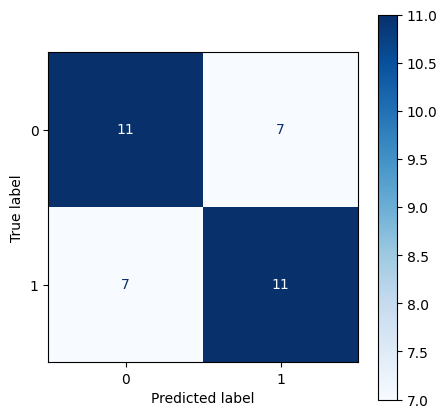

In [340]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(5, 5)) 
plot_confusion_matrix(knn, X_test, y_test, cmap='Blues', ax=ax)  
plt.show()

In [341]:
# precision-recall-f1
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        18
           1       0.61      0.61      0.61        18

    accuracy                           0.61        36
   macro avg       0.61      0.61      0.61        36
weighted avg       0.61      0.61      0.61        36



With classifying the 2 species with other classifiers like Naives Bayes and Logistic Regression from KNN, all perform worse than KNN in terms of accuracy.

The accuracy score (0.61), precision (0.61) and recall (0.61) for both classes of the KNN model is quite low, indicating that probability scores from CNN models are not reliable predictors to classify these 2 birds. The precision refers to the percentage of the images which are predicted correctly, and recall refers to the percentage of total correctly labeled images correctly classified by the algorithm.

I hypothesize that the reason is in birds’ picture, there are many other distracting features. For example, there are many type of birds with various shape and color in same background or maybe, the bird with the same shape, colors have many different type backgrounds. All of those aspects mixing together would definitely decrease the accuracy of KNN. Moreover, the two types of birds that we choose may be too hard for our ten models to predict (since all the predict probabilities are quite low), and do not create a clear separating pattern in the probabilities. It is possible that if a selection of probabilities form certain models is chosen as features only, or if we chose to classify on a different species, the performance of the classifier might go up.

## Conclusion


Throughout the project, the CNN method on tensorFlow tends to focus on calculating the pixels scores using the kernels. One limited point that we experienced with this model is that the size of the birds tends to be ignored. As a result, when the model runs into object-backround ratio errors, the model conducted surprising results in which the models that we expected to be easy to predict turned out to be medium or hard to differentiate. Likewise, based on hypotheses, the hard models tends to be easy to tell apart between 2 types of birds. 

Conducted the novel bird examination by choosing 'Horned Puffin' as our novel bird: this type of bird is quite different comparing to other birds chosen in 10 models (10 pairs of birds). The only thing I figured out is that some of the models having great performance when fitting the novel bird into class A or B while some of them have bad performance, indicating that the model shares no similarity with the novel bird. I have tested the model with 3 classifiers: KNN, Naive Bayesian, and Logistic Regression. The result was surprisingly lower than expected. 

In the future, there are areas for improving the model. The observation of bird and bird choice should be clearer in terms of species, picture color codes, and object-background ratios. With the more similar bird types, I suggest trying the model with more layers of convolution and re-run/re-train the model multiple times so that it would learn more about the difference between 2 examined birds. Moreover, with novel bird training, other classifiers, such as logistic classifier can be used to test on each model and how the novel bird fits into class A and B. With these suggestions, I believe the model will a higher accuracy in predicting the bird input pictures and identifying bird species.